In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
base = pd.read_csv("AirPassengers.csv")
base

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
dateparse = lambda dates: datetime.strptime(dates, "%Y-%m")
base = pd.read_csv("AirPassengers.csv", parse_dates= ["Month"],
                   index_col= "Month", date_parser= dateparse)

ts = base["#Passengers"]

C:\Users\steph\AppData\Local\Temp\ipykernel_99872\3126249107.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv("AirPassengers.csv", parse_dates= ["Month"],


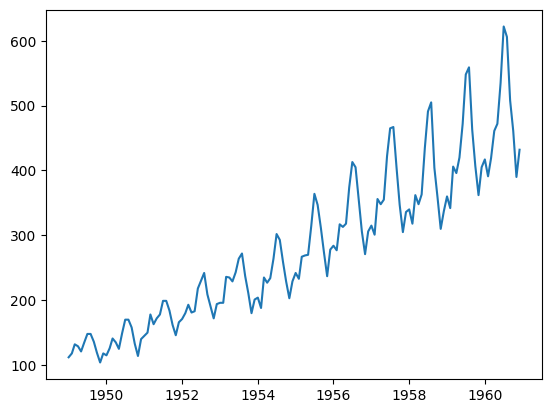

In [5]:
plt.plot(ts)

In [6]:
decomposicao = seasonal_decompose(ts)

In [7]:
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [9]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [10]:
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

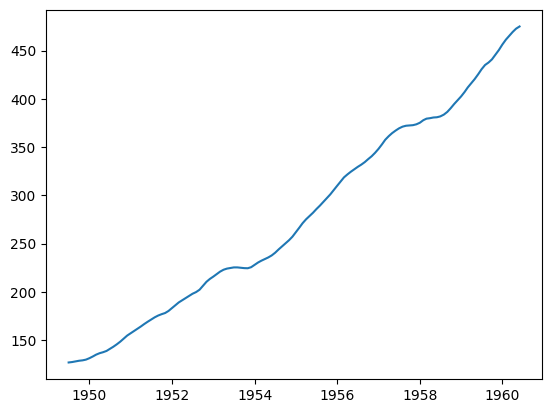

In [11]:
plt.plot(tendencia)

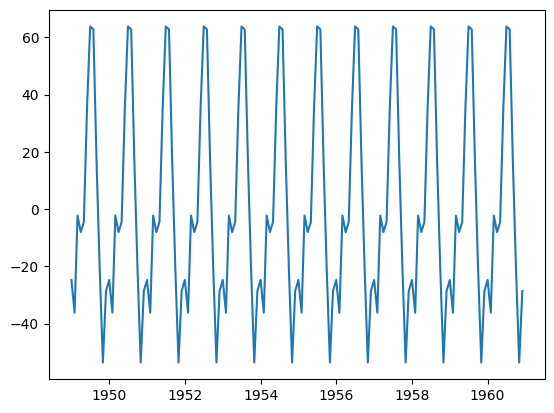

In [12]:
plt.plot(sazonal)

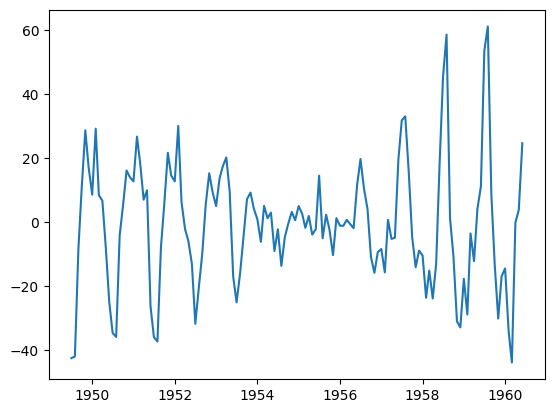

In [13]:
plt.plot(aleatorio)